## Imports e DataFrame

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas.api.types import is_numeric_dtype
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
def remove_not_numbers(df):
    df_c = df.copy()
    for i in df_c.columns:
        if is_numeric_dtype(df_c[i]) == False or str(df_c[i].dtype) == 'boolean':
            df_c = df_c.drop([i], axis=1)
        else:
            continue
    return df_c

In [3]:
df = pd.read_csv('Final Data.csv', index_col='Unnamed: 0')
df = df.convert_dtypes()
df = remove_not_numbers(df)
df

,latitude,wind_speed,wind_degree,pressure,precip,humidity,cloudcover,uv_index,visibility,temperature,feelslike
7,84.94,14,163,1022,0.0,80,5,1,10,0,-4
8,84.22,14,163,1022,0.0,80,5,1,10,0,-4
9,83.49,14,163,1022,0.0,80,5,1,10,0,-4
10,82.77,14,163,1022,0.0,80,5,1,10,0,-4
11,82.05,28,109,1013,0.0,80,37,1,10,5,1
...,...,...,...,...,...,...,...,...,...,...,...
224,-71.9,30,121,1002,0.0,60,46,1,10,-23,-36
225,-72.6,30,121,1002,0.0,60,46,1,10,-23,-36
226,-73.3,30,121,1002,0.0,60,46,1,10,-23,-36
227,-74.1,30,121,1002,0.0,60,46,1,10,-23,-36


In [4]:
subset_seed = 97404
training_subset_size = 0.2

features = ['latitude', 'wind_speed', 'wind_degree', 'pressure', 'precip', 'humidity', 'cloudcover', 'uv_index', 'visibility']

feat_treino, feat_teste = train_test_split(df[features], test_size=training_subset_size, random_state=subset_seed)
temp_treino, temp_teste = train_test_split(df["temperature"], test_size=training_subset_size, random_state=subset_seed)
feel_treino, feel_teste = train_test_split(df["feelslike"], test_size=training_subset_size, random_state=subset_seed)

## Checando os DataFrames

In [5]:
feat_treino

,latitude,wind_speed,wind_degree,pressure,precip,humidity,cloudcover,uv_index,visibility
13,80.6,28,109,1013,0.0,80,37,1,10
156,-22.7,14,16,1016,0.0,9,0,1,10
153,-20.6,13,27,1017,0.0,10,0,1,10
223,-71.2,30,121,1002,0.0,60,46,1,10
41,60.36,20,150,1012,0.3,73,0,5,10
...,...,...,...,...,...,...,...,...,...
105,14.1,13,209,1010,0.1,76,51,6,10
163,-27.8,15,309,1012,0.0,14,0,1,10
37,63.25,18,173,1012,0.8,89,73,4,9
173,-35.0,35,271,1012,0.0,75,10,1,10


In [6]:
temp_treino

13       5
156     21
153     19
223    -23
41      23
      ... 
105     26
163     23
37      19
173     14
135     28
Name: temperature, Length: 145, dtype: Int64

In [7]:
feel_treino

13       1
156     21
153     19
223    -36
41      25
      ... 
105     28
163     22
37      19
173     12
135     27
Name: feelslike, Length: 145, dtype: Int64

In [8]:
feat_teste

,latitude,wind_speed,wind_degree,pressure,precip,humidity,cloudcover,uv_index,visibility
27,70.48,5,244,1009,0.6,100,100,3,2
166,-30.0,19,282,1014,0.0,19,0,1,10
29,69.04,4,122,1008,0.0,86,48,3,10
49,54.58,14,137,1010,0.0,48,22,7,10
39,61.81,11,158,1014,1.2,85,76,4,9
50,53.86,11,123,1011,0.0,60,36,6,10
136,-8.31,9,340,1008,0.0,19,0,1,10
172,-34.3,4,87,1012,0.0,71,3,1,10
99,18.43,10,168,1006,0.0,13,7,9,10
137,-9.04,9,340,1008,0.0,19,0,1,10


In [9]:
temp_teste

27      11
166     20
29      10
49      26
39      19
50      24
136     28
172     13
99      38
137     28
144     23
19       5
139     25
154     19
107     24
47      24
17       4
38      20
12       5
146     23
227    -23
110     22
120     22
101     38
225    -23
15       4
114     21
158     22
224    -23
34      21
61      28
103     27
104     26
127     30
140     25
45      22
64      16
Name: temperature, dtype: Int64

In [10]:
feel_teste

27      11
166     20
29      10
49      26
39      19
50      25
136     26
172     13
99      38
137     26
144     23
19      -1
139     24
154     19
107     26
47      26
17      -1
38      20
12       1
146     23
227    -36
110     25
120     25
101     38
225    -36
15      -1
114     21
158     22
224    -36
34      21
61      27
103     29
104     28
127     30
140     24
45      25
64      16
Name: feelslike, dtype: Int64

## Random Forest

In [11]:
from sklearn.ensemble import RandomForestRegressor as RFR

temp_treino = temp_treino.ravel()
temp_teste = temp_teste.ravel()

modelo_rf_temp = RFR(random_state=subset_seed)
modelo_rf_feel = RFR(random_state=subset_seed)

modelo_rf_temp.fit(feat_treino, temp_treino)
modelo_rf_feel.fit(feat_treino, feel_treino)

previsao_temp = modelo_rf_temp.predict(feat_teste)
previsao_feel = modelo_rf_feel.predict(feat_teste)
print(previsao_temp)
print(previsao_feel)

[ 11.12  13.61  12.43  27.03  19.73  23.86  29.18  14.7   37.31  29.17
  22.97   6.46  24.42  19.91  22.59  22.72   4.76  21.21   4.78  23.22
 -23.    21.91  22.9   37.31 -23.     4.55  21.17  21.86 -23.    22.36
  27.98  26.14  25.41  28.77  24.36  21.7   20.2 ]
[ 10.14  14.65   9.89  27.49  19.85  24.74  27.19  13.64  37.39  27.02
  22.79   1.33  24.61  19.9   23.78  23.7    0.25  22.28   0.78  22.99
 -36.    22.29  24.54  37.39 -36.     0.36  21.24  21.93 -36.    23.66
  26.84  28.13  27.12  28.62  24.71  23.34  21.51]


In [12]:
RMSE_temp = mean_squared_error(temp_teste, previsao_temp, squared=False)
RMSE_feel = mean_squared_error(feel_teste, previsao_feel, squared=False)

print(f'RMSE temperature: {RMSE_temp}\nRMSE Feelslike: {RMSE_feel}')

RMSE temperature: 1.5403544695594882
RMSE Feelslike: 1.7499196892768878


c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [13]:
def rf(leafs, depth, trees):
    from itertools import product

    RMSEs = []
    
    for l, d, t in product(leafs, depth, trees):
        modelo_rf_temp = RFR(n_estimators=t, max_leaf_nodes=l, max_depth=d, random_state=subset_seed, n_jobs=4)
        modelo_rf_feel = RFR(n_estimators=t, max_leaf_nodes=l, max_depth=d, random_state=subset_seed, n_jobs=4)

        modelo_rf_temp.fit(feat_treino, temp_treino)
        modelo_rf_feel.fit(feat_treino, feel_treino)
        
        p_temp = modelo_rf_temp.predict(feat_teste)
        p_feel = modelo_rf_feel.predict(feat_teste)
        
        RMSE_temp = mean_squared_error(temp_teste, p_temp, squared=False)
        RMSE_feel = mean_squared_error(feel_teste, p_feel, squared=False)
        
        RMSEs.append([l, d, t, RMSE_temp, RMSE_feel])
        
        #print(f'Leafs={l}\t\tDepth={d}\t\tTrees={t}\t\tRMSE temperature={RMSE_temp}\t\tRMSE feelslike={RMSE_feel}')
        
    return RMSEs

In [14]:
%%capture --no-display

folhas = [None, 6]
profundidade = [None, 3]
arvores = [10, 100, 300]

RMSEs = rf(folhas, profundidade, arvores)

In [15]:
RMSEs

[[None, None, 10, 1.3030110658923193, 1.787040434213371],
 [None, None, 100, 1.5403544695594882, 1.7499196892768878],
 [None, None, 300, 1.622505477347927, 1.8116682206578947],
 [None, 3, 10, 2.8625041393371844, 3.6161721571432466],
 [None, 3, 100, 2.9312138805120367, 3.5732346883883968],
 [None, 3, 300, 2.9351824105582938, 3.585604562146409],
 [6, None, 10, 2.3531467745080907, 3.2885060901169036],
 [6, None, 100, 2.351115445995673, 3.150782422227823],
 [6, None, 300, 2.3734464537245765, 3.124265586093542],
 [6, 3, 10, 2.8625041393371857, 3.616172157143246],
 [6, 3, 100, 2.93087037501782, 3.5727930647262265],
 [6, 3, 300, 2.935346933267386, 3.585866482915836]]

### Melhores modelos

In [16]:
best_model_temp = RFR(n_estimators=10, random_state=subset_seed, n_jobs=4)
best_model_feel = RFR(n_estimators=100, random_state=subset_seed, n_jobs=4)

best_model_temp.fit(feat_treino, temp_treino)
best_model_feel.fit(feat_treino, feel_treino)

prev_temp = best_model_temp.predict(feat_teste)
prev_feel = best_model_feel.predict(feat_teste)

print(mean_squared_error(temp_teste, prev_temp, squared=False))
print(mean_squared_error(feel_teste, prev_feel, squared=False))

1.3030110658923193
1.7499196892768878


c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


## Hiperparâmetros

In [17]:
folhas = [None]
for i in range(2, 100):
    folhas.append(i)

profundidade = [None]
for i in range(1, 100):
    profundidade.append(i)

arvores = [i for i in range(1, 100)]

In [42]:
%%capture --no-display

RMSEs_temp = []
RMSEs_feel = []
for i in folhas:
    model_temp = RFR(max_leaf_nodes=i, random_state=subset_seed, n_jobs=4)
    model_feel= RFR(max_leaf_nodes=i, random_state=subset_seed, n_jobs=4)
    
    model_temp.fit(feat_treino, temp_treino)
    model_feel.fit(feat_treino, feel_treino)
    
    prev_temp = model_temp.predict(feat_teste)
    prev_feel = model_feel.predict(feat_teste)
    
    RMSE_temp = mean_squared_error(temp_teste, prev_temp, squared=False)
    RMSE_feel = mean_squared_error(feel_teste, prev_feel, squared=False)
    
    RMSEs_temp.append(RMSE_temp)
    RMSEs_feel.append(RMSE_feel)

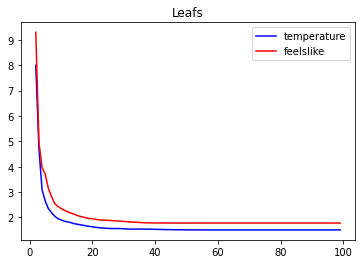

Leafs:
Temperature RMSE:1.5102001676120418, Index:53, Value:54
Feelslike RMSE:1.7499196892768878, Index:0, Value:None


In [44]:
fig, axe = plt.subplots()
axe.plot(folhas, RMSEs_temp, color='b', label='temperature')
axe.plot(folhas, RMSEs_feel, color='r', label='feelslike')
axe.legend(loc='upper right')
axe.title.set_text('Leafs')
plt.show()

index_temp = RMSEs_temp.index(min(RMSEs_temp))
index_feel = RMSEs_feel.index(min(RMSEs_feel))

print('Leafs:')
print(f'Temperature RMSE:{min(RMSEs_temp)}, Index:{index_temp}, Value:{folhas[index_temp]}')
print(f'Feelslike RMSE:{min(RMSEs_feel)}, Index:{index_feel}, Value:{folhas[index_feel]}')

In [45]:
%%capture --no-display

RMSEs_temp = []
RMSEs_feel = []
for i in profundidade:
    model_temp = RFR(max_depth=i, random_state=subset_seed, n_jobs=4)
    model_feel= RFR(max_depth=i, random_state=subset_seed, n_jobs=4)
    
    model_temp.fit(feat_treino, temp_treino)
    model_feel.fit(feat_treino, feel_treino)
    
    prev_temp = model_temp.predict(feat_teste)
    prev_feel = model_feel.predict(feat_teste)
    
    RMSE_temp = mean_squared_error(temp_teste, prev_temp, squared=False)
    RMSE_feel = mean_squared_error(feel_teste, prev_feel, squared=False)
    
    RMSEs_temp.append(RMSE_temp)
    RMSEs_feel.append(RMSE_feel)

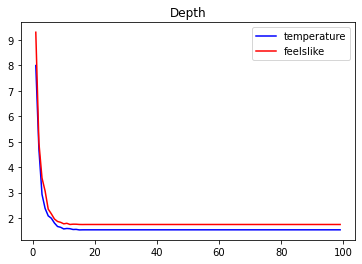

Depth:
Temperature RMSE:1.536538192387337, Index:15, Value:16
Feelslike RMSE:1.7483627959368777, Index:16, Value:17


In [46]:
fig, axe = plt.subplots()
axe.plot(profundidade, RMSEs_temp, color='b', label='temperature')
axe.plot(profundidade, RMSEs_feel, color='r', label='feelslike')
axe.legend(loc='upper right')
axe.title.set_text('Depth')
plt.show()

index_temp = RMSEs_temp.index(min(RMSEs_temp))
index_feel = RMSEs_feel.index(min(RMSEs_feel))

print('Depth:')
print(f'Temperature RMSE:{min(RMSEs_temp)}, Index:{index_temp}, Value:{folhas[index_temp]}')
print(f'Feelslike RMSE:{min(RMSEs_feel)}, Index:{index_feel}, Value:{folhas[index_feel]}')

In [47]:
%%capture --no-display

RMSEs_temp = []
RMSEs_feel = []
for i in arvores:
    model_temp = RFR(n_estimators=i, random_state=subset_seed, n_jobs=4)
    model_feel= RFR(n_estimators=i, random_state=subset_seed, n_jobs=4)
    
    model_temp.fit(feat_treino, temp_treino)
    model_feel.fit(feat_treino, feel_treino)
    
    prev_temp = model_temp.predict(feat_teste)
    prev_feel = model_feel.predict(feat_teste)
    
    RMSE_temp = mean_squared_error(temp_teste, prev_temp, squared=False)
    RMSE_feel = mean_squared_error(feel_teste, prev_feel, squared=False)
    
    RMSEs_temp.append(RMSE_temp)
    RMSEs_feel.append(RMSE_feel)

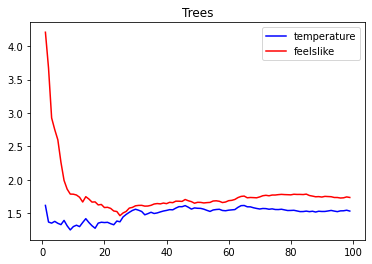

Trees:
Temperature RMSE:1.2530909398643968, Index:8, Value:9
Feelslike RMSE:1.4658195751957421, Index:24, Value:25


In [48]:
fig, axe = plt.subplots()
axe.plot(arvores, RMSEs_temp, color='b', label='temperature')
axe.plot(arvores, RMSEs_feel, color='r', label='feelslike')
axe.legend(loc='upper right')
axe.title.set_text('Trees')
plt.show()

index_temp = RMSEs_temp.index(min(RMSEs_temp))
index_feel = RMSEs_feel.index(min(RMSEs_feel))

print('Trees:')
print(f'Temperature RMSE:{min(RMSEs_temp)}, Index:{index_temp}, Value:{folhas[index_temp]}')
print(f'Feelslike RMSE:{min(RMSEs_feel)}, Index:{index_feel}, Value:{folhas[index_feel]}')

### Melhores modelos

In [50]:
best_model_temp = RFR(max_leaf_nodes=54, max_depth=16, n_estimators=9, random_state=subset_seed, n_jobs=4)
best_model_feel = RFR(max_leaf_nodes=None, max_depth=17, n_estimators=25, random_state=subset_seed, n_jobs=4)

best_model_temp.fit(feat_treino, temp_treino)
best_model_feel.fit(feat_treino, feel_treino)

prev_temp = best_model_temp.predict(feat_teste)
prev_feel = best_model_feel.predict(feat_teste)

print(mean_squared_error(temp_teste, prev_temp, squared=False))
print(mean_squared_error(feel_teste, prev_feel, squared=False))

1.5192721340981266
1.4658195751957421


c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


## Importância

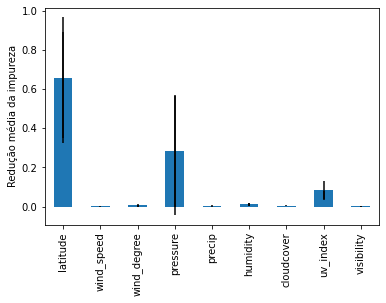

In [51]:
importancia_temp = best_model_temp.feature_importances_
importancia_feel = best_model_feel.feature_importances_

desvio_padrao_temp = np.std([arvore.feature_importances_ for arvore in best_model_temp.estimators_], axis=0)
desvio_padrao_feel = np.std([arvore.feature_importances_ for arvore in best_model_feel.estimators_], axis=0)

serie_importancia_temp = pd.Series(importancia_temp, index=features)
serie_importancia_feel = pd.Series(importancia_feel, index=features)

fig, axe = plt.subplots()

serie_importancia_temp.plot.bar(yerr=desvio_padrao_temp, ax=axe)
serie_importancia_feel.plot.bar(yerr=desvio_padrao_feel, ax=axe)

axe.set_ylabel("Redução média da impureza")
plt.show()

In [52]:
from sklearn.inspection import permutation_importance

N_REPETICOES = 10

def R2_1param(modelo, x, y):
    """Computa o coef. de determinação quando hip. alt. não tem coef. linear."""
    y_pred = modelo.predict(x).ravel()
    y_true = (np.array(y)).ravel()
    return 1 - sum((y_true - y_pred) ** 2) / sum(y_true**2)


X_local = feat_treino
y_local_temp = temp_treino
y_local_feel = feel_treino

R2_temp = R2_1param(best_model_temp, X_local, y_local_temp)
print(f"O R^2 da previsão temperature é de {R2_temp}\n")

r_temp = permutation_importance(
    best_model_temp,
    X_local,
    y_local_temp,
    n_repeats=N_REPETICOES,
    random_state=subset_seed,
    scoring=R2_1param,
)

for i in r_temp.importances_mean.argsort()[::-1]:
    if r_temp.importances_mean[i] - 2 * r_temp.importances_std[i] > 0:
        print(f"{features[i]:<8} "
              f"{r_temp.importances_mean[i]:.3f}"
              f" +/- {r_temp.importances_std[i]:.3f}")
        
print('\n\n\n')

R2_feel = R2_1param(best_model_feel, X_local, y_local_feel)
print(f"O R^2 da previsão feelslike é de {R2_feel}\n")

r_feel = permutation_importance(
    best_model_feel,
    X_local,
    y_local_feel,
    n_repeats=N_REPETICOES,
    random_state=subset_seed,
    scoring=R2_1param,
)

for i in r_feel.importances_mean.argsort()[::-1]:
    if r_feel.importances_mean[i] - 2 * r_feel.importances_std[i] > 0:
        print(f"{features[i]:<8} "
              f"{r_feel.importances_mean[i]:.3f}"
              f" +/- {r_feel.importances_std[i]:.3f}")

O R^2 da previsão temperature é de 0.9990739361361578

latitude 0.265 +/- 0.017
pressure 0.076 +/- 0.006
uv_index 0.027 +/- 0.004
humidity 0.003 +/- 0.000
wind_degree 0.001 +/- 0.000
precip   0.001 +/- 0.000
cloudcover 0.001 +/- 0.000
wind_speed 0.000 +/- 0.000
visibility 0.000 +/- 0.000




O R^2 da previsão feelslike é de 0.9983411575599357

latitude 0.406 +/- 0.028
pressure 0.081 +/- 0.006
uv_index 0.031 +/- 0.004
humidity 0.004 +/- 0.001
wind_degree 0.001 +/- 0.000
precip   0.001 +/- 0.000
cloudcover 0.001 +/- 0.000
wind_speed 0.000 +/- 0.000
visibility 0.000 +/- 0.000
